In [ ]:
from google.colab import files
uploaded = files.upload()


Saving text.csv to text (1).csv


In [ ]:
# 🛠 התקנות
!pip install -U numpy==1.26.4
!pip install -U gensim==4.3.3
!pip install -U xgboost optuna wordcloud textblob seaborn

# 🧠 הורדת משאבים ל-NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# ✅ אישור שהכל עלה
import numpy
import gensim
import xgboost
print("✅ numpy:", numpy.__version__)
print("✅ gensim:", gensim.__version__)
print("✅ xgboost:", xgboost.__version__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ numpy: 1.26.4
✅ gensim: 4.3.3
✅ xgboost: 3.0.2


In [ ]:
import pandas as pd

df = pd.read_csv("text.csv")
df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec


In [ ]:

# Data manipulation and analysis
import pandas as pd  # DataFrame operations
import numpy as np  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud, ImageColorGenerator  # Word cloud generation
from PIL import Image  # Image processing

# Text processing
import string  # String operations
from nltk.tokenize import word_tokenize  # Tokenizing text
from nltk.corpus import stopwords  # Common stop words
from nltk.stem import PorterStemmer  # Stemming words
import nltk  # Natural language toolkit
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stop words data

# Text analysis
from textblob import TextBlob  # Text processing library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization

# Data balancing
from sklearn.utils import resample  # Resampling data

# Data preparation
import optuna  # Hyperparameter tuning library
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold

# Word embeddings
import gensim.downloader as api  # Download pre-trained Word2Vec models
from gensim.models import Word2Vec  # Word2Vec model

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Ensemble models
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.svm import LinearSVC

from sklearn import metrics  # Evaluation metrics

from sklearn.dummy import DummyClassifier  # Dummy classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics

from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences
from tensorflow.keras.utils import to_categorical  # One-hot encoding
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, SpatialDropout1D  # Layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks

# Utility
import warnings  # Warning control
warnings.filterwarnings('ignore')  # Ignore warnings
from collections import Counter  # Count occurrences of elements

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## About the dataset

In [ ]:
# Load dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [ ]:
df.describe()


,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def classes_plot(df):
  fig , ax = plt.subplots(figsize=(6,4))
  sns.countplot(x='label', data=df, color='cyan')
  plt.title("sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)")
  plt.show()

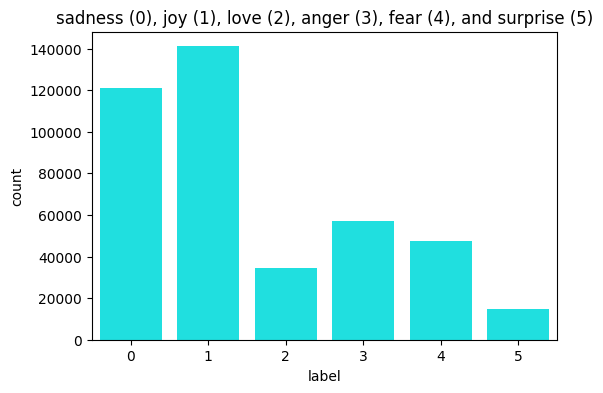

In [ ]:
classes_plot(df)

# **As we can see the dataset is not balanced, so we use undersample technique to make the dataset balanced according to the smallest class (surprise)**

In [ ]:
# Splitting the dataset to 3 different datasets as mentioned above
# Starting with the simple one - keeping the original dataset
original_df = df

In [ ]:
from sklearn.utils import resample


Number of data for each class is: 7486


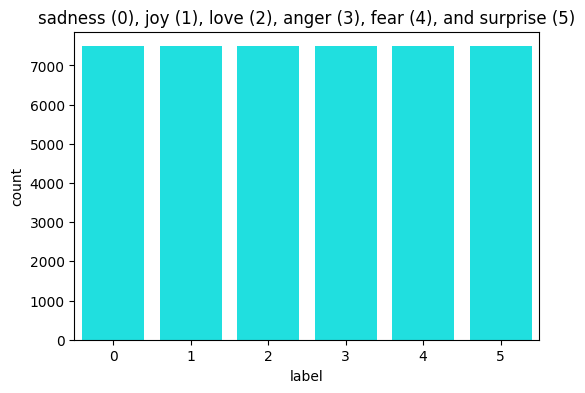

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [ ]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]
df_4 = df[df['label'] == 4]
df_5 = df[df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# Downsample the majority classes to n_samples_label_5 samples
# The random_state variable act like a seed.
# Setting random_state=42 helps in making your code reproducible and ensures that the results are consistent across different runs.
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

# Combine the downsampled data with the minority class data along the y-axis
df_downsampled = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

# Shuffle the combined dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled)
df_downsampled.head()

In [ ]:
def extract_href_sentence_lengths(df, text_column='text'):
    """
    Extracts the lengths of sentences that start with the words 'href', 'http' and 'www' in a given DataFrame column.

    Parameters:
    - df: DataFrame containing the data
    - text_column: Name of the column containing text data (default: 'text')

    Returns:
    - Lists of sentence lengths that start with 'href', 'http' and 'www'
    """
    href_sentence_lengths = []
    http_sentence_lengths = []
    www_sentence_lengths = []
    # Iterate through each text in the DataFrame
    for text in df[text_column]:
        # Split text into sentences based on common sentence delimiters
        sentences = text.split(' ')
        for sentence in sentences:
            if sentence.lower().startswith('href'):
                href_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('http'):
                http_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('www'):
                www_sentence_lengths.append(len(text))
    return href_sentence_lengths, http_sentence_lengths, www_sentence_lengths

In [ ]:
def plot_text_length_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of text lengths by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x='text_length', hue=label_column, multiple='stack', bins=30)
    plt.title(f"Distribution of Text Lengths by Class for '{df_name}' dataset")
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def plot_word_clouds(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Generates word clouds for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    def plot_word_cloud(text, label):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(9, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Label {label} in '{df_name}' dataset")
        plt.axis('off')
        plt.show()

    for label in df[label_column].unique():
        text = ' '.join(df[df[label_column] == label][text_column])
        plot_word_cloud(text, label)

In [ ]:
# Function to plot the most common words for each class
def plot_top_n_words(df, df_name='DataFrame', text_column='text', label_column='label', n=10):
    """
    Plots the top N most common words for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: n: Number of top words to plot (default: 10)
    """
    def plot_words(text, label, n):
        vec = CountVectorizer().fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} Words for Label {label} in '{df_name}' dataset")
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_words(text, label, n)

In [ ]:
# Function to plot the most common bigrams and trigrams for each class
def plot_ngrams(df, df_name='DataFrame', text_column='text', label_column='label', ngram_range=(2, 2), n=10):
    """
    Plots the most common n-grams (bigrams or trigrams) for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: ngram_range: Tuple specifying the n-gram range (default: (2, 2))
    param: n: Number of top n-grams to plot (default: 10)
    """
    def plot_ngrams_for_label(text, label, ngram_range, n):
        vec = CountVectorizer(ngram_range=ngram_range).fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} {'-'.join(map(str, ngram_range))}grams for Label {label} in '{df_name}' dataset")
        # plt.title(f'Top {n} {"-".join(map(str, ngram_range))}grams for Label {label}')
        plt.xlabel('Frequency')
        plt.ylabel('N-gram')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_ngrams_for_label(text, label, ngram_range, n)


In [ ]:
# Function to plot the sentiment polarity distribution by class
def plot_sentiment_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of sentiment polarity scores by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=label_column, y='sentiment', data=df)
    plt.title(f"Sentiment Polarity Distribution by Class for '{df_name}' daaset")
    plt.xlabel('Label')
    plt.ylabel('Sentiment Polarity')
    plt.show()

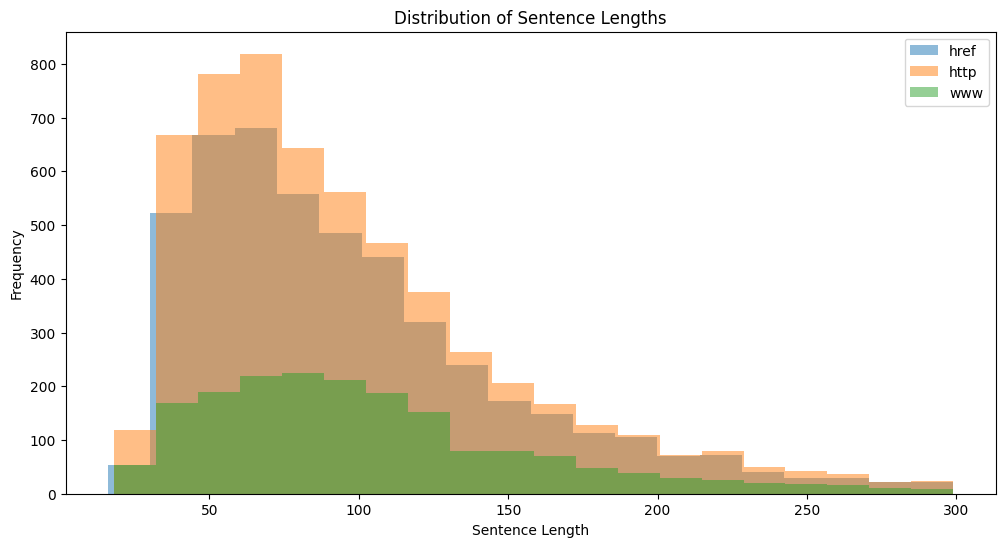

Number of sentences starting with 'href': 4789
Number of sentences starting with 'http': 5632
Number of sentences starting with 'www': 1855


In [ ]:
# Extract lengths of sentences starting with 'href' and 'http' and 'www'
href_sentence_lengths, http_sentence_lengths, www_sentence_lengths = extract_href_sentence_lengths(df)
# plotting the distribution of each array

plt.figure(figsize=(12, 6))
plt.hist(href_sentence_lengths, bins=20, alpha=0.5, label='href')
plt.hist(http_sentence_lengths, bins=20, alpha=0.5, label='http')
plt.hist(www_sentence_lengths, bins=20, alpha=0.5, label='www')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.legend()
plt.show()
print(f"Number of sentences starting with 'href': {len(href_sentence_lengths)}")
print(f"Number of sentences starting with 'http': {len(http_sentence_lengths)}")
print(f"Number of sentences starting with 'www': {len(www_sentence_lengths)}")

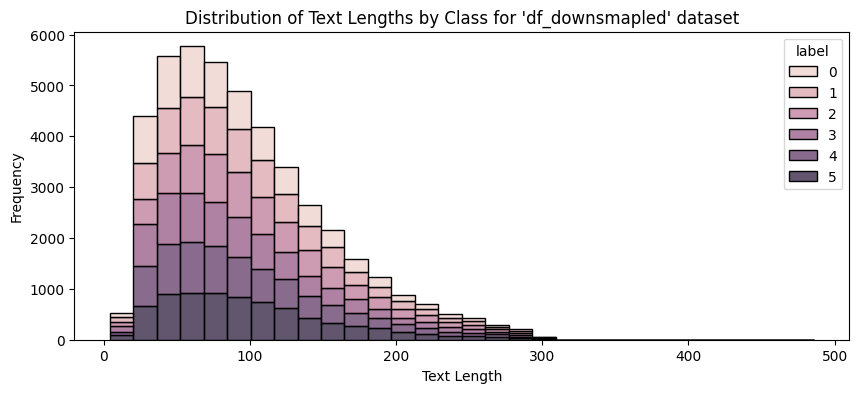

In [ ]:
# Plotting te text length for both original_df and df_downsampled to see the difference
# plot_text_length_distribution(df=original_df, df_name='original_df')
plot_text_length_distribution(df_downsampled, df_name='df_downsmapled')

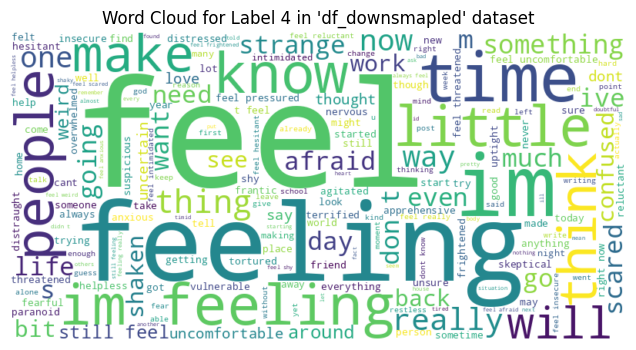

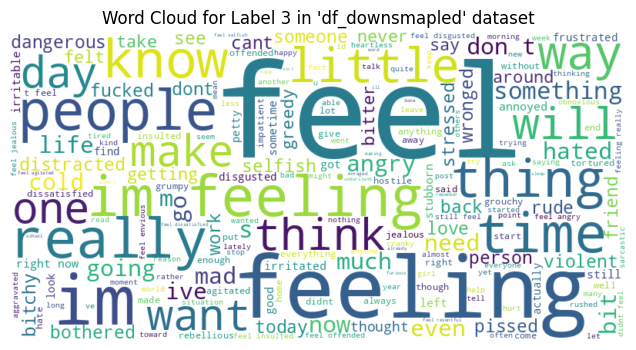

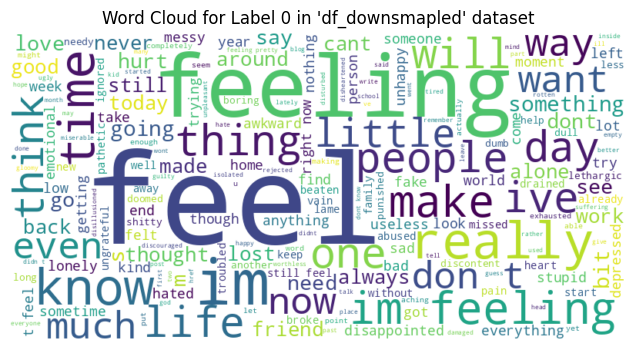

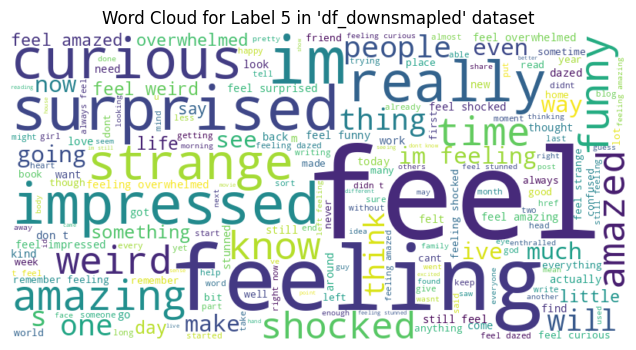

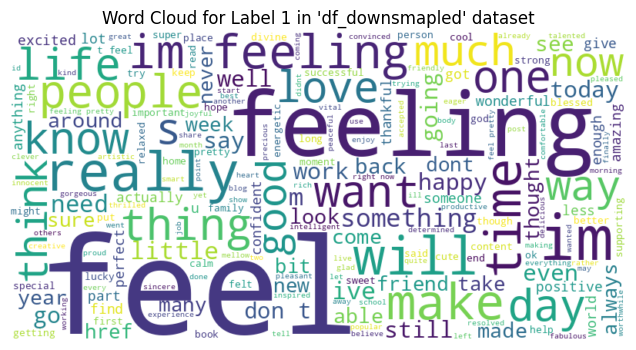

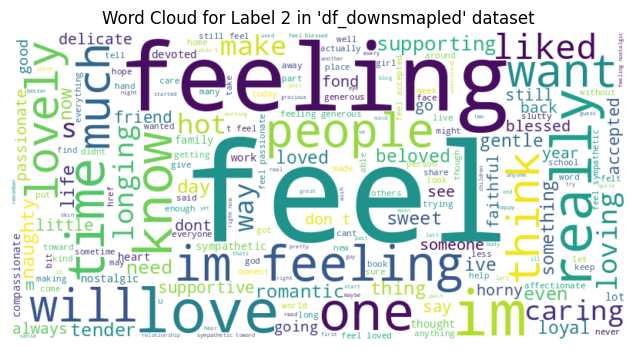

In [ ]:
from wordcloud import WordCloud

plot_word_clouds(df=df_downsampled, df_name='df_downsmapled')
# plot_word_clouds(df=original_df, df_name='original_df')

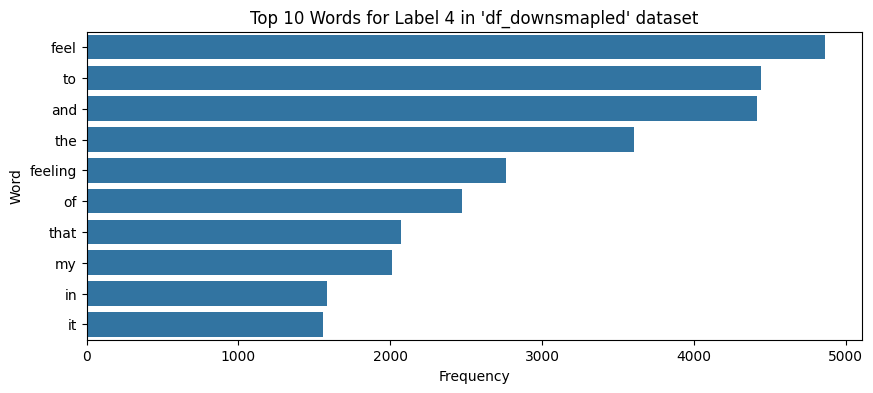

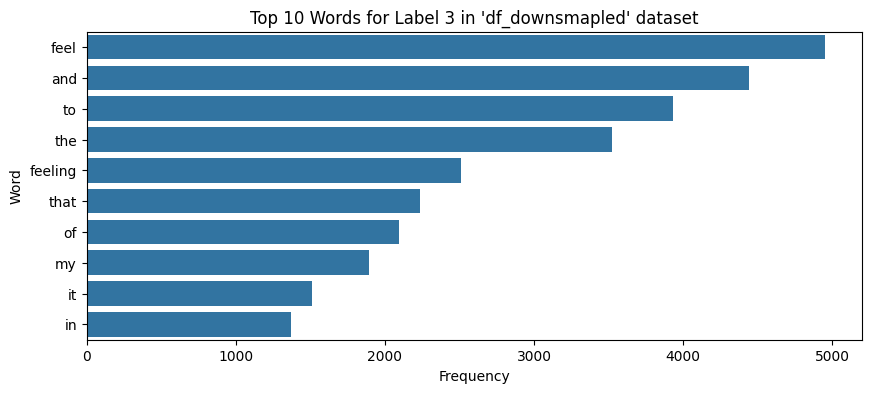

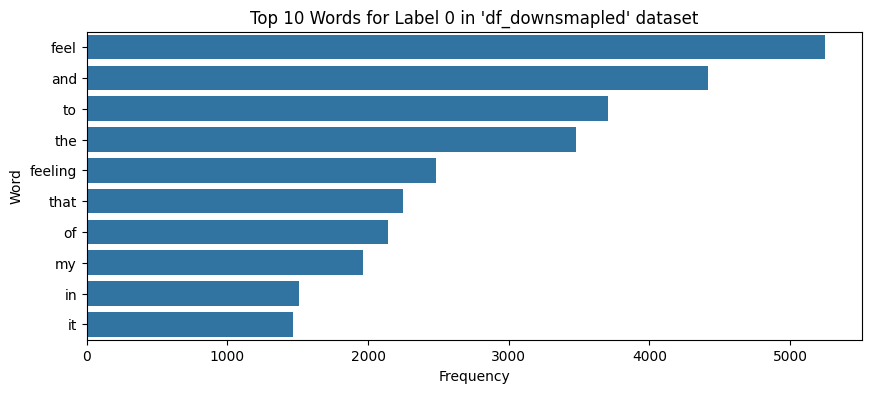

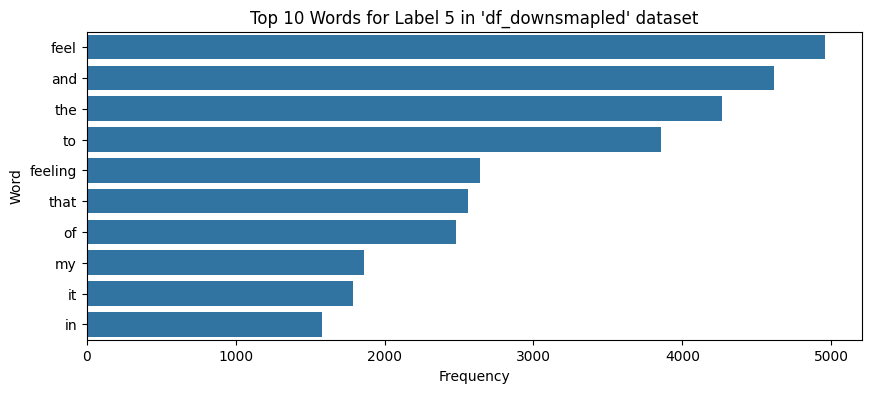

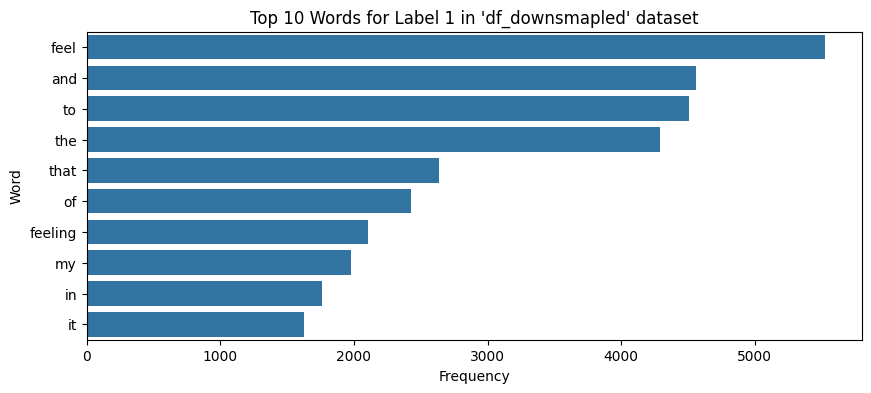

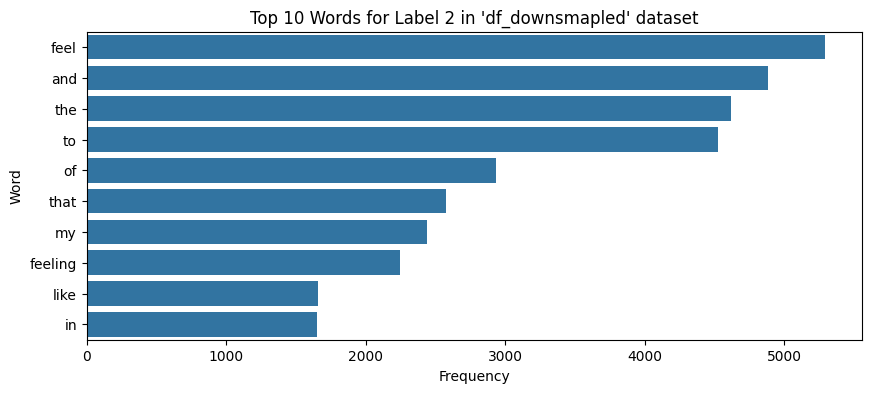

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

plot_top_n_words(df=df_downsampled, df_name='df_downsmapled')
# plot_top_n_words(df=original_df,  df_name='original_df')

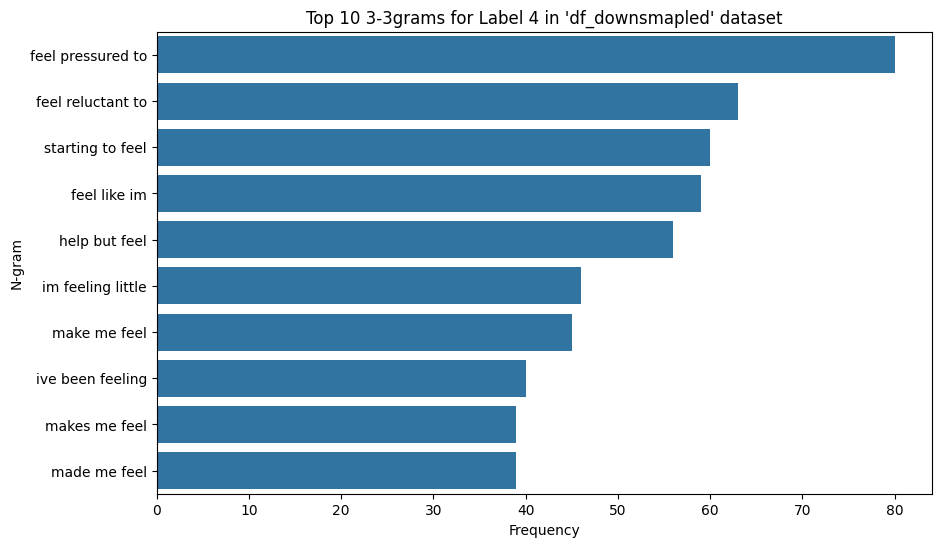

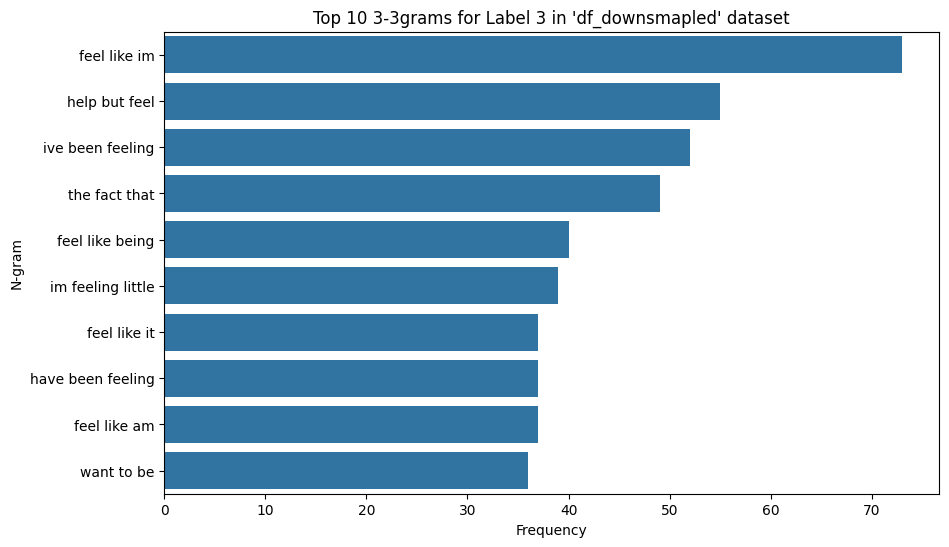

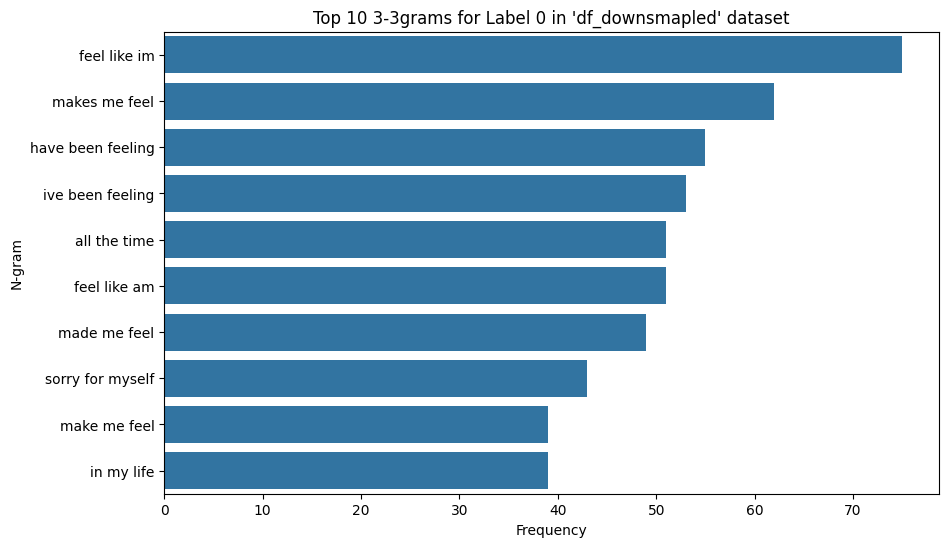

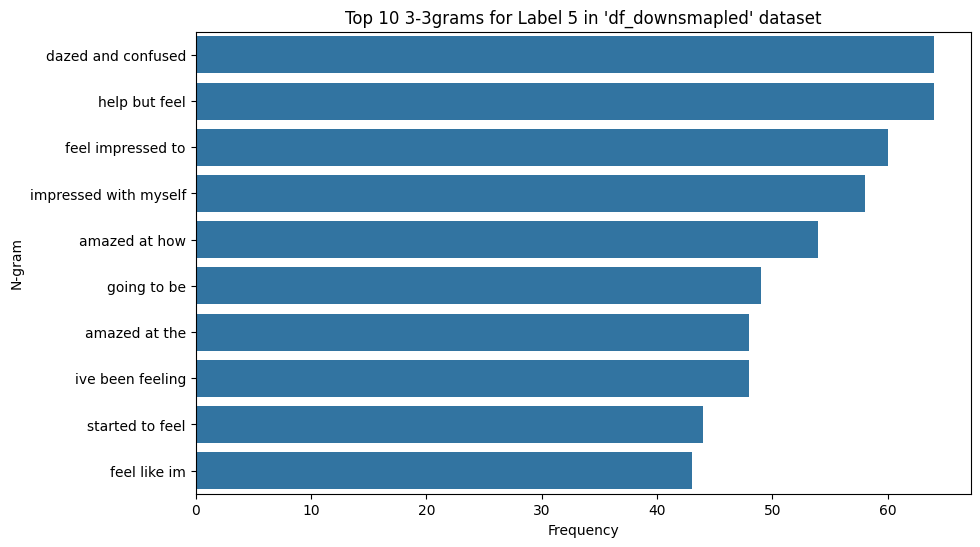

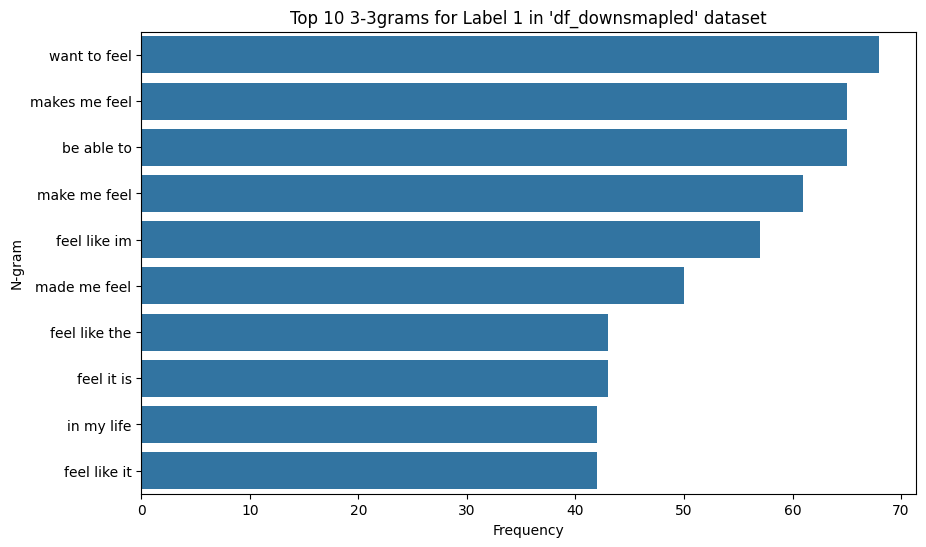

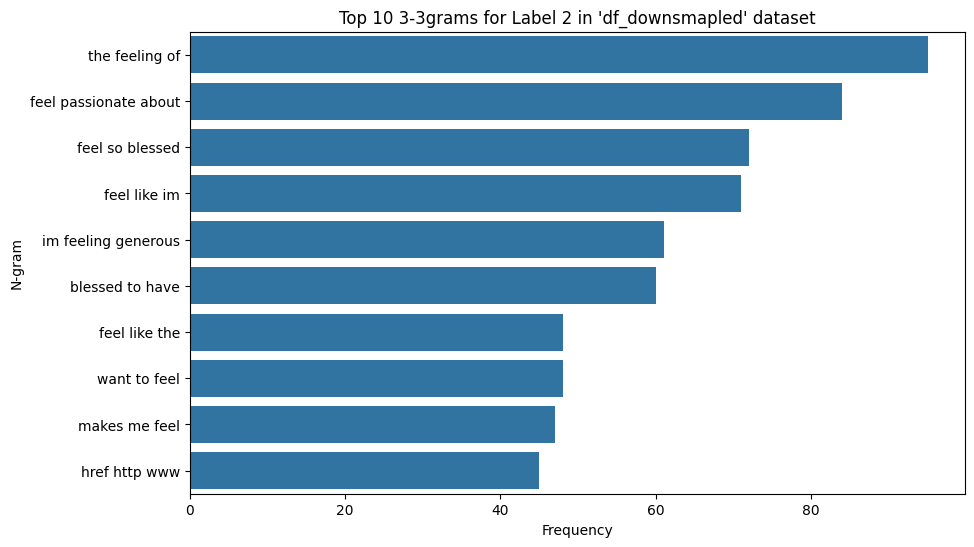

In [ ]:
plot_ngrams(df=df_downsampled,  df_name='df_downsmapled', ngram_range=(3, 3))  # For trigrams
# plot_ngrams(df=original_df,  df_name='original_df', ngram_range=(3, 3))  # For trigrams

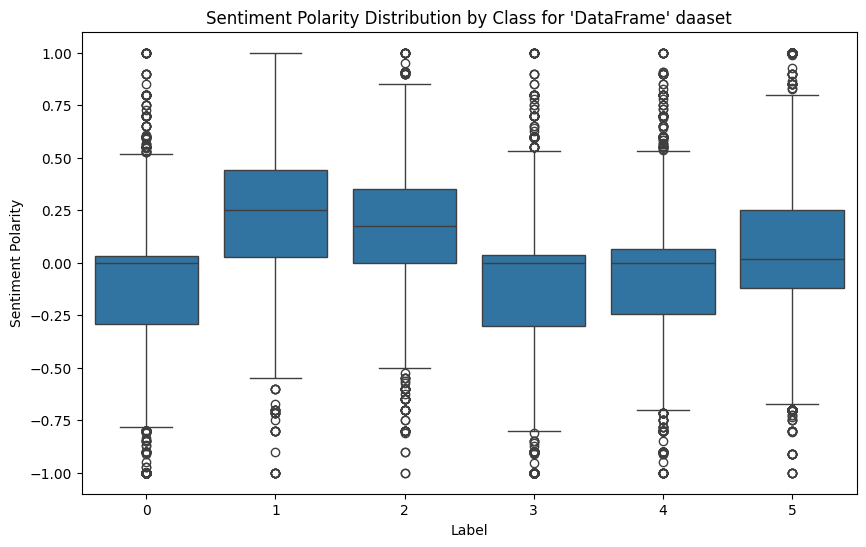

In [ ]:
from textblob import TextBlob

plot_sentiment_distribution(df_downsampled) # Should discuss if it's important or not
# plot_sentiment_distribution(original_df) # Should discuss if it's important or not

<Axes: xlabel='sentiment', ylabel='Density'>

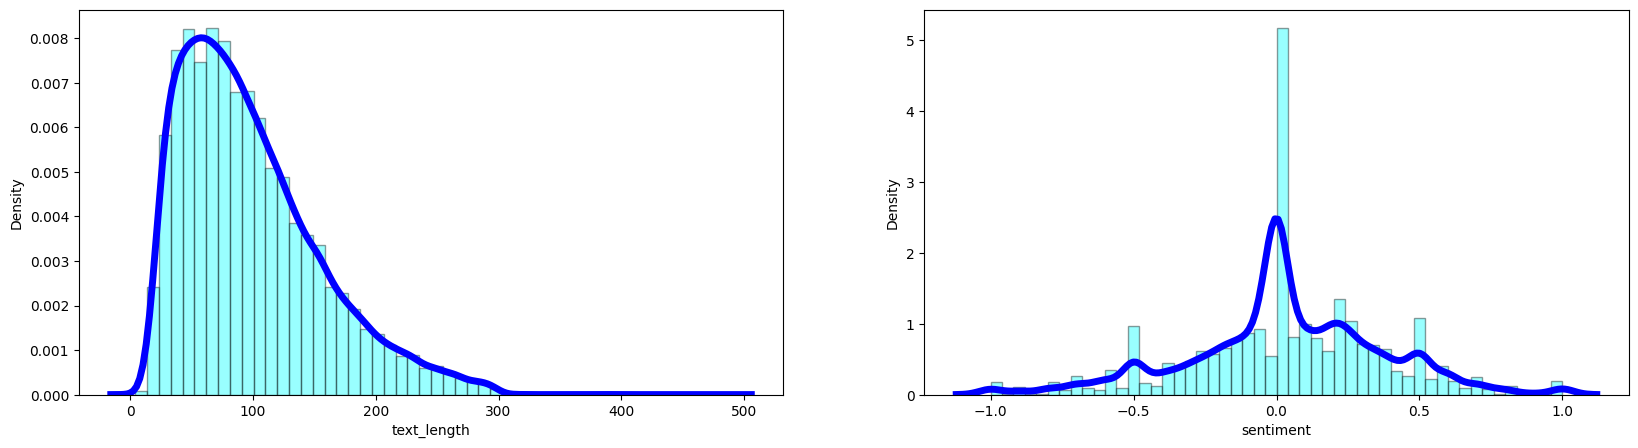

In [36]:
fig, axes = plt.subplots(1,2, figsize = (20,5))
sns.distplot(df_downsampled['text_length'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(df_downsampled['sentiment'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])


**Pre-proccessing in the text phase**




In the next few codes (functions), we will apply several techniques such as: Tokenization, Removing stop words, Stemming, Vectorization, and Embedding.

This applied to make the dataset simpler by splitting the words from each other, removing unneccessary words (that don't contribute to the whole sentence), stemming to convert the words to their base form, vectorization

In [37]:
## tokenization refers to breaking down a sentence into individual words.
def tokenize_text(df, text_column='text'):
    """
    Tokenizes the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data (default: 'text')
    return: DataFrame with tokenized text
    type: (DataFrame, str) -> DataFrame
    """
    df['tokenized_text'] = df[text_column].apply(word_tokenize)
    return df


def remove_stop_words(df, text_column='tokenized_text'):
    """
    Removes stop words from the tokenized text.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing tokenized text data (default: 'tokenized_text')
    return: DataFrame with stop words removed
    type: (DataFrame, str) -> DataFrame
    """
    custom_stopwords = {"i","im","like", "feel", "feeling", "my", "the", "to", "still"
                        "for","know","littl","think","time","thing","would","go",
                        "really","feel","am","so","get", "one", "to", "and", "at", "can",
                        "day","way", "make", "me", "want", "could" , "would", "tri", "u", "href", "http", "www", "com", "https"
                        }
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)
    df['text_no_stopwords'] = df[text_column].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

In [39]:
def apply_stemming(df, text_column='text_no_stopwords'):
    """
    Applies stemming to the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data without stop words (default: 'text_no_stopwords')
    return: DataFrame with stemmed text
    type: (DataFrame, str) -> DataFrame
    """
    stemmer = PorterStemmer()
    df['stemmed_text'] = df[text_column].apply(lambda x: [stemmer.stem(word) for word in x])
    return df

In [40]:
def load_glove_vectors(glove_file):
    """
    Loads GloVe vectors from a file.

    param: glove_file: Path to the GloVe file
    return: Dictionary of word to vector mappings
    type: str -> dict
    """
    glove_model = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model


In [41]:
def get_glove_embeddings(df, glove_model, text_column='stemmed_text'):
    """
    Gets word embeddings using GloVe.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing stemmed text data (default: 'stemmed_text')
    return: DataFrame with word embeddings
    type: (DataFrame, dict, str) -> DataFrame
    """
    def embed_text(tokens):
        embedding_dim = len(next(iter(glove_model.values())))
        embeddings = [glove_model[word] for word in tokens if word in glove_model]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(embedding_dim)

    df['text_embedding'] = df[text_column].apply(embed_text)
    return df


In [42]:
def preprocess_text_data(df, glove_model, text_column='text', label_column='label'):
    """
    Preprocesses text data through tokenization, stop word removal, stemming, and embedding.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    return: Preprocessed DataFrame with embeddings
    type: (DataFrame, dict, str, str) -> DataFrame
    """
    df = tokenize_text(df, text_column)
    df = remove_stop_words(df)
    df = apply_stemming(df)
    df = get_glove_embeddings(df, glove_model)
    return df

In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Load GloVe model
glove_file = "drive/MyDrive/kaggle_files/glove.6B.100d.txt"  # Path to the GloVe file
glove_model = load_glove_vectors(glove_file)

In [46]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # <- זה השלב החסר
nltk.download('stopwords')  # ליתר ביטחון אם עוד לא עשית


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
df_downsampled_preprocessed = preprocess_text_data(df_downsampled, glove_model)
# df_preprocessed = preprocess_text_data(original_df)
print(df_downsampled_preprocessed.head())

   Unnamed: 0                                               text  label  \
0       84526                     i feel shaken up and torn down      4   
1      227655                                       on reperbahn      3   
2      339603  i feel insulted that he doesnt know me better ...      3   
3      281246  i imagine that my fellow liberals get the same...      3   
4      192230  i dont know why im writing it here and not tel...      3   

   text_length  sentiment                                     tokenized_text  \
0           30  -0.155556             [i, feel, shaken, up, and, torn, down]   
1           12   0.000000                                    [on, reperbahn]   
2           55   0.500000  [i, feel, insulted, that, he, doesnt, know, me...   
3          150   0.183333  [i, imagine, that, my, fellow, liberals, get, ...   
4          131   0.000000  [i, dont, know, why, im, writing, it, here, an...   

                                   text_no_stopwords  \
0           

In [48]:
df_downsampled_preprocessed.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding
0,84526,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0...."
1,227655,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,339603,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0...."
3,281246,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1..."
4,192230,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0..."
